# Scrapping - GREECE

In [ ]:
# GREEK NEWSPAPER
#tovima.gr
#https://www.tovima.gr/category/society/

In [ ]:
# IMPORT LIBRARIES
import requests
from bs4 import BeautifulSoup
import pandas as pd
!pip install googletrans==4.0.0-rc1
!pip install vaderSentiment
from googletrans import Translator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)


In [ ]:
#PARSE CONTENT

# URL of the webpage we want to scrape
url = 'https://www.tovima.gr/category/society/'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.text, 'html.parser')

# Extract specific data from the page: finding all <a> tags with a specific class
links = soup.find_all('a', class_='link-class')

In [ ]:

# Translate text from Greek to English
def translate_to_english(text):
    translator = Translator()
    translation = translator.translate(text, src='el', dest='en')
    return translation.text

# Scrape articles from URL
def scrape_articles(url):
    response = requests.get(url)

    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract specific data from the page: finding all <figure> tags with a specific style attribute
    figures = soup.find_all('figure', style=True)

    # Find all <time> tags with the specified class
    time_tags = soup.find_all('time', class_='line-height-1 mr-3 post-date updated manrope is-size-5 semigrey-c')

    # Initialize lists to store the translated content
    alt_contents_en = []
    time_contents_en = []

    # Print out the translated content
    for figure, time_content in zip(figures, time_tags):
        alt_content = figure.find('img')['alt'] if figure.find('img') else None

        # Translate content to English and append to lists
        alt_content_en = translate_to_english(alt_content) if alt_content else None
        time_content_en = translate_to_english(time_content.text.strip()) if time_content else None

        alt_contents_en.append(alt_content_en)
        time_contents_en.append(time_content_en)

    # Create a DataFrame from the translated content
    articles_df = pd.DataFrame({
        'Alt Content': alt_contents_en,
        'Time Content': time_contents_en
    })

    return articles_df


url = 'https://www.tovima.gr/category/society/'

# Scrape articles from the first page
greek_news = scrape_articles(url)

# Pagination URLs for pages 3 to 6
page_3_url = 'https://www.tovima.gr/category/society/page/3/'
page_4_url = 'https://www.tovima.gr/category/society/page/4/'
page_5_url = 'https://www.tovima.gr/category/society/page/5/'
page_6_url = 'https://www.tovima.gr/category/society/page/6/'

# Scrape articles from pages 3 to 6 and concatenate with the existing DataFrame
greek_news_page_3 = scrape_articles(page_3_url)
greek_news_page_4 = scrape_articles(page_4_url)
greek_news_page_5 = scrape_articles(page_5_url)
greek_news_page_6 = scrape_articles(page_6_url)

greek_news = pd.concat([greek_news, greek_news_page_3, greek_news_page_4, greek_news_page_5, greek_news_page_6], ignore_index=True)

# Save the DataFrame to a CSV file
greek_news.to_csv('greek_news_extended.csv', index=False)

# Print the DataFrame
print(greek_news)


                                          Alt Content       Time Content
0       "The first thing I caught and didn't destroy"  02.05.2024, 20:23
1   Rolling in Voula: Two engines dragged the woma...  02.05.2024, 20:13
2   Rolling in Piraeus: Anxiety for the 5 -year -o...  02.05.2024, 19:54
3             Good Friday: Shop and supermarket hours  02.05.2024, 19:50
4   Good Friday: "Life in the Grave" - The culmina...  02.05.2024, 19:12
..                                                ...                ...
87  Easter 2024: Open stores today - the hours for...  28.04.2024, 09:22
88  Thessaloniki: Great fire in a nightclub - the ...  28.04.2024, 09:03
89  Exarchia: Scene with injured police officer - ...  28.04.2024, 08:22
90               Rentis: Prisoner 6 of the defendants  27.04.2024, 23:28
91  Santorini: landslide in Thirasia - Damages to ...  27.04.2024, 21:53

[92 rows x 2 columns]


In [ ]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Get sentiment score
def get_sentiment_score(text):
    if text:
        score = analyzer.polarity_scores(text)
        return score['compound']
    else:
        return None

# Apply sentiment analysis to 'Alt Content' column
greek_news['Sentiment'] = greek_news['Alt Content'].apply(get_sentiment_score)

# Print the DataFrame with sentiment scores
print(greek_news)


                                          Alt Content       Time Content  \
0       "The first thing I caught and didn't destroy"  02.05.2024, 20:23   
1   Rolling in Voula: Two engines dragged the woma...  02.05.2024, 20:13   
2   Rolling in Piraeus: Anxiety for the 5 -year -o...  02.05.2024, 19:54   
3             Good Friday: Shop and supermarket hours  02.05.2024, 19:50   
4   Good Friday: "Life in the Grave" - The culmina...  02.05.2024, 19:12   
..                                                ...                ...   
87  Easter 2024: Open stores today - the hours for...  28.04.2024, 09:22   
88  Thessaloniki: Great fire in a nightclub - the ...  28.04.2024, 09:03   
89  Exarchia: Scene with injured police officer - ...  28.04.2024, 08:22   
90               Rentis: Prisoner 6 of the defendants  27.04.2024, 23:28   
91  Santorini: landslide in Thirasia - Damages to ...  27.04.2024, 21:53   

    Sentiment  
0      0.4310  
1     -0.6908  
2     -0.4588  
3      0.4404  
4      

# Pre-Processing - GREECE

In [ ]:
# SENTIMENT ANALYSIS

# Calculate the average sentiment score for 'Alt Content' column
alt_content_avg_sentiment = greek_news['Sentiment'].mean()

print("Average Sentiment Score for Alt Content:", alt_content_avg_sentiment)

# Sort the DataFrame by 'Alt Content Sentiment' in ascending order
greek_news_sorted = greek_news.sort_values(by='Sentiment')

# Get the top 5 most negative sentiment pages
most_negative_pages = greek_news_sorted.head(5)

# Sort the DataFrame by 'Alt Content Sentiment' in descending order
greek_news_sorted_desc = greek_news.sort_values(by='Sentiment', ascending=False)

# Get the top 5 most positive sentiment pages
most_positive_pages = greek_news_sorted_desc.head(5)

print("Most Negative Sentiment Pages:")
print(most_negative_pages)

print("\nMost Positive Sentiment Pages:")
print(most_positive_pages)

Average Sentiment Score for Alt Content: -0.1626141304347826
Most Negative Sentiment Pages:
                                          Alt Content       Time Content  \
71  Marousi: Documentary video a few minutes after...  28.04.2024, 21:41   
59  Eye: Up to 5 years the guilty will serve, rage...  29.04.2024, 10:49   
44  Pikermi: Dead 62 -year -old in a car accident ...  X0.04.2024, 06:56   
18  Pikermi: Video - Documentary from the Rolling ...  X0.04.2024, 18:47   
86  Marousi: Shots outside the nightclub - one dea...  28.04.2024, 09:40   

    Sentiment  
71    -0.8360  
59    -0.8271  
44    -0.8126  
18    -0.8126  
86    -0.7906  

Most Positive Sentiment Pages:
                                          Alt Content        Time Content  \
12  Vervesos for Eye: Justice is awarded exclusive...   X0.04.2024, 21:47   
64  Weather: Great week with stormy winds, Easter ...  29.04.2024, 07: X9   
31  Great Tuesday: The parable of the ten virgins ...   X0.04.2024, 13:05   
63  Eye: The De

In [ ]:

# TOPIC ANALYSIS

import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Download NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Filter words based on POS
def filter_words(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        tagged_words = pos_tag(words)
        filtered_words = [word for word, pos in tagged_words if pos.startswith('NN') or pos.startswith('VB') or pos.startswith('JJ')]
        return ' '.join(filtered_words)
    else:
        return ''

# Apply POS filtering to the DataFrame
greek_news_filtered = greek_news.applymap(filter_words)

# Vectorize the text data
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(greek_news_filtered['Alt Content'])

# Train the LDA model
num_topics = 5  # Adjust the number of topics as needed
lda_model = LatentDirichletAllocation(n_components=num_topics, max_iter=10, learning_method='online', random_state=42)
lda_model.fit(tfidf)


def print_topics(model, vectorizer, n_words=10):
    words = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([words[i] for i in topic.argsort()[:-n_words - 1:-1]]))

print("Topics found via LDA:")
print_topics(lda_model, tfidf_vectorizer)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Topics found via LDA:
Topic 0:
crete marousi association nightclub ix earthquake blocked victim authorities risk
Topic 1:
eye day fires year old subway years rolling drug documentary
Topic 2:
easter week sunday kassiani tuesday weather today great arkas immigrants
Topic 3:
thessaloniki thirasia athens boost landslide good downtown friday easter accident
Topic 4:
world greek eye appeal court voula killed intervention did strike


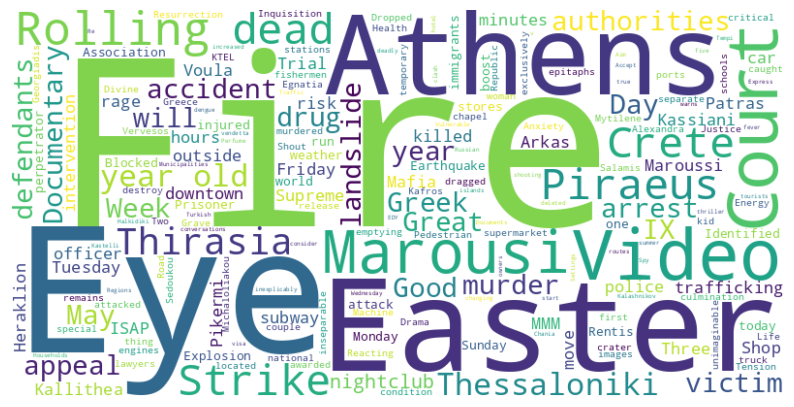

In [ ]:
#TOPIC VISUALIZATION

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all filtered text into a single string
all_text = ' '.join(greek_news['Alt Content'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Scraping - FINLAND

In [ ]:
# FINLAND
#https://www.dailyfinland.fi/all-news/national

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.dailyfinland.fi/all-news/national'
response = requests.get(url)
print(response.text)

# Parse the HTML content of the page
soup = BeautifulSoup(response.text, 'html.parser')

# Extract specific data from the page: finding all <a> tags with a specific class
links = soup.find_all('a', class_='link-class')



<!doctype html>
<html>
<head><meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<title>Daily Finland, English News from Finland</title>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
<meta charset="utf-8">
<meta name="viewport" content="width=device-width, initial-scale=1">
<meta name="Developed By" content="orangebd.com" />
<meta name="keywords" content="Finland, Suomi, news from Finland, English news from Finland, English language news from Finland, Helsinki, Tampere, Turku, Oulu, Rovaniemi, Vaasa, Kokkola, Jyvaskyla, Arctic, Lapland, Snow, Ice, Santa, Santa Claus, Rendeer, Poro, Porocup, Arcktikum , Arctic Circle, northern light, Aurora Borealis,  Snow hotel, Arctic Light Hotel, Helsingin Sanomat, Helsinki Times, Finland Times,Finlandtimes,Ftimes,df,Finland Today, Daily Finland, Helsinki University, University of Finland, Viking Lines, Silja Lines, Finnair, Helsinki Airport, Rovan

In [ ]:

import requests
from bs4 import BeautifulSoup
import pandas as pd

# Scrape articles and dates
def scrape_articles(url):
    # Send a GET request to the URL
    response = requests.get(url)

    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all <h4> tags inside <div class="content_sum_block">
    article_titles = soup.select('.content_sum_block h4')

    # Find all <p> tags inside <div class="post_date">
    article_dates = soup.select('.content_sum_block .post_date p')

    # Extract article titles and dates
    titles = [title.text.strip() for title in article_titles]
    dates = [date.text.strip() for date in article_dates]

    df = pd.DataFrame({'Alt Content': titles, 'Time Content': dates})

    return df


start_url = 'https://www.dailyfinland.fi/all-news/national'

# Scrape articles from the starting page
all_news_df = scrape_articles(start_url)

# Pagination URLs for pages 2 to 7
pagination_urls = [f'https://www.dailyfinland.fi/all-news/national/?pg={i}' for i in range(2, 8)]

# Scrape articles from each page and concatenate with the existing DataFrame
for url in pagination_urls:
    df = scrape_articles(url)
    all_news_df = pd.concat([all_news_df, df], ignore_index=True)

# Save the DataFrame to a CSV file
all_news_df.to_csv('all_news_articles_with_dates.csv', index=False)

# Print the DataFrame
print(all_news_df)

                                          Alt Content        Time Content
0      Finland ranks 5th again in Press Freedom Index  03 May 2024, 11:56
1    FM censures violence against Georgian protestors  03 May 2024, 03:52
2    Finland joins US Nat´l Guard Partnership Program  03 May 2024, 03:29
3   Number of child welfare notifications doubles ...  03 May 2024, 03:20
4   Perussuomalaiset MP expelled from parliamentar...  02 May 2024, 20:41
..                                                ...                 ...
65         Stubb to meet EU, NATO leaders in Brussels  08 Apr 2024, 02:47
66   Woman stabbed to death in Helsinki, suspect held  07 Apr 2024, 22:14
67  Man killed by falling lumbers while working in...  07 Apr 2024, 03:13
68  78% bird species cannot tolerate intense human...  07 Apr 2024, 01:56
69  Finland, US sign MoU on countering foreign sta...  07 Apr 2024, 01:36

[70 rows x 2 columns]


# Pre-Processing - FINLAND

In [ ]:
# SENTIMENT ANALYSIS

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Get sentiment score
def get_sentiment_score(text):
    if text:
        score = analyzer.polarity_scores(text)
        return score['compound']
    else:
        return None

# Apply sentiment analysis to 'Alt Content' column
all_news_df['Sentiment'] = all_news_df['Alt Content'].apply(get_sentiment_score)

# Drop unwanted columns
all_news_df.drop(['Alt Content Sentiment', 'Time Content Sentiment'], axis=1, inplace=True)


# Print the DataFrame with sentiment scores
print(all_news_df)

                                          Alt Content        Time Content  \
0      Finland ranks 5th again in Press Freedom Index  03 May 2024, 11:56   
1    FM censures violence against Georgian protestors  03 May 2024, 03:52   
2    Finland joins US Nat´l Guard Partnership Program  03 May 2024, 03:29   
3   Number of child welfare notifications doubles ...  03 May 2024, 03:20   
4   Perussuomalaiset MP expelled from parliamentar...  02 May 2024, 20:41   
..                                                ...                 ...   
65         Stubb to meet EU, NATO leaders in Brussels  08 Apr 2024, 02:47   
66   Woman stabbed to death in Helsinki, suspect held  07 Apr 2024, 22:14   
67  Man killed by falling lumbers while working in...  07 Apr 2024, 03:13   
68  78% bird species cannot tolerate intense human...  07 Apr 2024, 01:56   
69  Finland, US sign MoU on countering foreign sta...  07 Apr 2024, 01:36   

    Sentiment  
0      0.6369  
1     -0.6249  
2      0.0000  
3      0.07

In [ ]:

# Calculate the average sentiment score for 'Alt Content' column
alt_content_avg_sentiment = all_news_df['Sentiment'].mean()

print("Average Sentiment Score for Content:", alt_content_avg_sentiment)

# Sort the DataFrame by 'Alt Content Sentiment' in ascending order
all_news_sorted = all_news_df.sort_values(by='Sentiment')

# Get the top 5 most negative sentiment pages
most_negative_pages = all_news_sorted.head(5)

# Sort the DataFrame by 'Alt Content Sentiment' in descending order
all_news_sorted_desc = all_news_df.sort_values(by='Sentiment', ascending=False)

# Get the top 5 most positive sentiment pages
most_positive_pages = all_news_sorted_desc.head(5)

print("Most Negative Sentiment Pages:")
print(most_negative_pages)

print("\nMost Positive Sentiment Pages:")
print(most_positive_pages)

Average Sentiment Score for Content: -0.1558185714285714
Most Negative Sentiment Pages:
                                          Alt Content        Time Content  \
19  Finland steps up fight against youth crime ami...  25 Apr 2024, 21:17   
66   Woman stabbed to death in Helsinki, suspect held  07 Apr 2024, 22:14   
64  Gun used in Vantaa school murder was stored pr...  09 Apr 2024, 02:30   
6                 Man killed in Oulu, 2 suspects held  01 May 2024, 03:51   
58       Rising violent crimes by youths worry police  11 Apr 2024, 01:06   

    Sentiment  
19    -0.8807  
66    -0.8402  
64    -0.7964  
6     -0.7845  
58    -0.7783  

Most Positive Sentiment Pages:
                                          Alt Content        Time Content  \
25  Int´l peace still possible through reforming, ...  24 Apr 2024, 01:30   
0      Finland ranks 5th again in Press Freedom Index  03 May 2024, 11:56   
30  Stubb hails US House´s approval of $61b aid fo...  22 Apr 2024, 02:35   
40  Stubb's v

In [ ]:
# TOPIC MODELLING

import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Download NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Filter words based on POS
def filter_words(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        tagged_words = pos_tag(words)
        filtered_words = [word for word, pos in tagged_words if pos.startswith('NN') or pos.startswith('VB') or pos.startswith('JJ')]
        return ' '.join(filtered_words)
    else:
        return ''

# Apply POS filtering to the DataFrame
all_news_df_filtered = all_news_df.applymap(filter_words)

# Vectorize the text data
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(all_news_df_filtered['Alt Content'])

# Train the LDA model
num_topics = 5  # Adjust the number of topics as needed
lda_model = LatentDirichletAllocation(n_components=num_topics, max_iter=10, learning_method='online', random_state=42)
lda_model.fit(tfidf)

def print_topics(model, vectorizer, n_words=10):
    words = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([words[i] for i in topic.argsort()[:-n_words - 1:-1]]))

print("Topics found via LDA:")
print_topics(lda_model, tfidf_vectorizer)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Topics found via LDA:
Topic 0:
finland govt estonia refugees sign q1 number censures remains sweden
Topic 1:
police speeding club perussuomalaiset mp night shooting east middle youths
Topic 2:
killed border russian road russia strike govt gaza held man
Topic 3:
ukraine stubb police crashed youths president school rising woman eu
Topic 4:
helsinki pm finnish nato forest held woman eu deal security


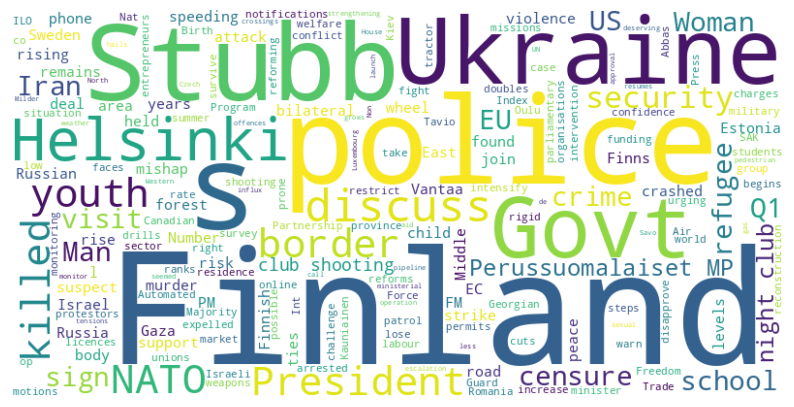

In [ ]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all filtered text into a single string
all_text = ' '.join(all_news_df_filtered['Alt Content'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Comparative Sentiment Analysis

In [ ]:
# MAP PLOTS

In [ ]:

import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import folium

# Load the dataframes from CSV files
greek_news_df = pd.read_csv('greek_news_extended.csv')
finland_news_df = pd.read_csv('all_news_articles_with_dates.csv')

# Function to calculate sentiment score
def get_sentiment_score(text):
    analyzer = SentimentIntensityAnalyzer()
    if pd.notnull(text) and text.strip():
        score = analyzer.polarity_scores(text)
        return score['compound']
    else:
        return None

# Apply sentiment analysis to Greece news DataFrame
greek_news_df['Sentiment'] = greek_news_df['Alt Content'].apply(get_sentiment_score)

# Apply sentiment analysis to Finland news DataFrame
finland_news_df['Sentiment'] = finland_news_df['Alt Content'].apply(get_sentiment_score)

# Calculate average sentiment for Greece and Finland
greek_sentiment = greek_news_df['Sentiment'].mean()
finland_sentiment = finland_news_df['Sentiment'].mean()

# Define color for Greece and Finland based on sentiment score
greek_color = 'green' if greek_sentiment > finland_sentiment else 'red'
finland_color = 'green' if finland_sentiment > greek_sentiment else 'red'

# Create a world map visualization
world_map = folium.Map(location=[48, 15], zoom_start=3)

# Add marker for Greece
folium.Marker(
    location=[38.9954, 21.9877],
    popup=f'Greece Sentiment: {greek_sentiment:.2f}',
    icon=folium.Icon(color=greek_color)
).add_to(world_map)

# Add marker for Finland
folium.Marker(
    location=[61.9241, 25.7482],
    popup=f'Finland Sentiment: {finland_sentiment:.2f}',
    icon=folium.Icon(color=finland_color)
).add_to(world_map)

# Display the combined map for both countries
world_map

# Comparative Trend Analysis

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
import pandas as pd
from datetime import datetime

# Convert the time format
def convert_time_format(date_str):
    # Convert the date string to a datetime object
    date_obj = datetime.strptime(date_str, "%d %b %Y, %H:%M")
    # Format the datetime object to match the desired format
    return date_obj.strftime("%d.%m.%Y, %H:%M")

# Apply the function to the Time Content column in finland_news_df
finland_news_df['Time Content'] = finland_news_df['Time Content'].apply(convert_time_format)

# Now finland_news_df has the same time format as greek_news_df
print(finland_news_df)


                                          Alt Content       Time Content  \
0      Finland ranks 5th again in Press Freedom Index  03.05.2024, 11:56   
1    FM censures violence against Georgian protestors  03.05.2024, 03:52   
2    Finland joins US Nat´l Guard Partnership Program  03.05.2024, 03:29   
3   Number of child welfare notifications doubles ...  03.05.2024, 03:20   
4   Perussuomalaiset MP expelled from parliamentar...  02.05.2024, 20:41   
..                                                ...                ...   
65         Stubb to meet EU, NATO leaders in Brussels  08.04.2024, 02:47   
66   Woman stabbed to death in Helsinki, suspect held  07.04.2024, 22:14   
67  Man killed by falling lumbers while working in...  07.04.2024, 03:13   
68  78% bird species cannot tolerate intense human...  07.04.2024, 01:56   
69  Finland, US sign MoU on countering foreign sta...  07.04.2024, 01:36   

    Sentiment  
0      0.6369  
1     -0.6249  
2      0.0000  
3      0.0772  
4     -

In [ ]:

# Drop rows with null values in the 'Alt Content' column for finland_news_df
finland_news_df = finland_news_df.dropna(subset=['Alt Content'])

# Drop rows with null values in the 'Alt Content' column for greek_news_df
greek_news_df = greek_news_df.dropna(subset=['Alt Content'])


In [ ]:

# Calculate sentiment score
def get_sentiment_score(text):
    analyzer = SentimentIntensityAnalyzer()
    if pd.notnull(text) and text.strip():
        score = analyzer.polarity_scores(text)
        return score['compound']
    else:
        return None

# Add country labels to each DataFrame
finland_news_df['Country'] = 'Finland'
greek_news_df['Country'] = 'Greece'

# Concatenate the Finnish and Greek news DataFrames
combined_df = pd.concat([finland_news_df[['Alt Content', 'Time Content', 'Sentiment','Country']],
                         greek_news_df[['Alt Content', 'Time Content', 'Sentiment','Country']]], ignore_index=True)

# Impute missing values in 'Time Content' column
combined_df['Time Content'] = combined_df['Time Content'].fillna(method='ffill')

# Remove the time part from the 'Time Content' column
combined_df['Time Content'] = combined_df['Time Content'].astype(str).apply(lambda x: x.split(',')[0])

# Convert the 'Time Content' column to a consistent format (dd.mm.YYYY)
combined_df['Time Content'] = pd.to_datetime(combined_df['Time Content'], format='%d.%m.%Y', errors='coerce')


print(combined_df)

# Save the combined DataFrame to CSV
combined_df.to_csv('combined_data.csv', index=False)


                                           Alt Content Time Content  \
0       Finland ranks 5th again in Press Freedom Index   2024-05-03   
1     FM censures violence against Georgian protestors   2024-05-03   
2     Finland joins US Nat´l Guard Partnership Program   2024-05-03   
3    Number of child welfare notifications doubles ...   2024-05-03   
4    Perussuomalaiset MP expelled from parliamentar...   2024-05-02   
..                                                 ...          ...   
157  Easter 2024: Open stores today - the hours for...   2024-04-28   
158  Thessaloniki: Great fire in a nightclub - the ...   2024-04-28   
159  Exarchia: Scene with injured police officer - ...   2024-04-28   
160               Rentis: Prisoner 6 of the defendants   2024-04-27   
161  Santorini: landslide in Thirasia - Damages to ...   2024-04-27   

     Sentiment  Country  
0       0.6369  Finland  
1      -0.6249  Finland  
2       0.0000  Finland  
3       0.0772  Finland  
4      -0.2500  F

In [ ]:
finland_news_df.head()

,Alt Content,Time Content,Sentiment,Country
0,Finland ranks 5th again in Press Freedom Index,"03.05.2024, 11:56",0.6369,Finland
1,FM censures violence against Georgian protestors,"03.05.2024, 03:52",-0.6249,Finland
2,Finland joins US Nat´l Guard Partnership Program,"03.05.2024, 03:29",0.0000,Finland
3,Number of child welfare notifications doubles ...,"03.05.2024, 03:20",0.0772,Finland
4,Perussuomalaiset MP expelled from parliamentar...,"02.05.2024, 20:41",-0.2500,Finland


In [ ]:
greek_news_df.head()

,Alt Content,Time Content,Sentiment,Country
0,"""The first thing I caught and didn't destroy""","02.05.2024, 20:23",0.4310,Greece
1,Rolling in Voula: Two engines dragged the woma...,"02.05.2024, 20:13",-0.6908,Greece
2,Rolling in Piraeus: Anxiety for the 5 -year -o...,"02.05.2024, 19:54",-0.4588,Greece
3,Good Friday: Shop and supermarket hours,"02.05.2024, 19:50",0.4404,Greece
4,"Good Friday: ""Life in the Grave"" - The culmina...","02.05.2024, 19:12",0.5994,Greece


In [ ]:
# Forward fill missing dates in the 'Time Content' column
combined_df['Time Content'] = combined_df['Time Content'].fillna(method='ffill')

# Display the DataFrame to verify changes
print(combined_df)


                                           Alt Content Time Content  \
0       Finland ranks 5th again in Press Freedom Index   2024-05-03   
1     FM censures violence against Georgian protestors   2024-05-03   
2     Finland joins US Nat´l Guard Partnership Program   2024-05-03   
3    Number of child welfare notifications doubles ...   2024-05-03   
4    Perussuomalaiset MP expelled from parliamentar...   2024-05-02   
..                                                 ...          ...   
157  Easter 2024: Open stores today - the hours for...   2024-04-28   
158  Thessaloniki: Great fire in a nightclub - the ...   2024-04-28   
159  Exarchia: Scene with injured police officer - ...   2024-04-28   
160               Rentis: Prisoner 6 of the defendants   2024-04-27   
161  Santorini: landslide in Thirasia - Damages to ...   2024-04-27   

     Sentiment  Country  
0       0.6369  Finland  
1      -0.6249  Finland  
2       0.0000  Finland  
3       0.0772  Finland  
4      -0.2500  F

In [ ]:
combined_df.head()

,Alt Content,Time Content,Sentiment,Country
0,Finland ranks 5th again in Press Freedom Index,2024-05-03,0.6369,Finland
1,FM censures violence against Georgian protestors,2024-05-03,-0.6249,Finland
2,Finland joins US Nat´l Guard Partnership Program,2024-05-03,0.0000,Finland
3,Number of child welfare notifications doubles ...,2024-05-03,0.0772,Finland
4,Perussuomalaiset MP expelled from parliamentar...,2024-05-02,-0.2500,Finland


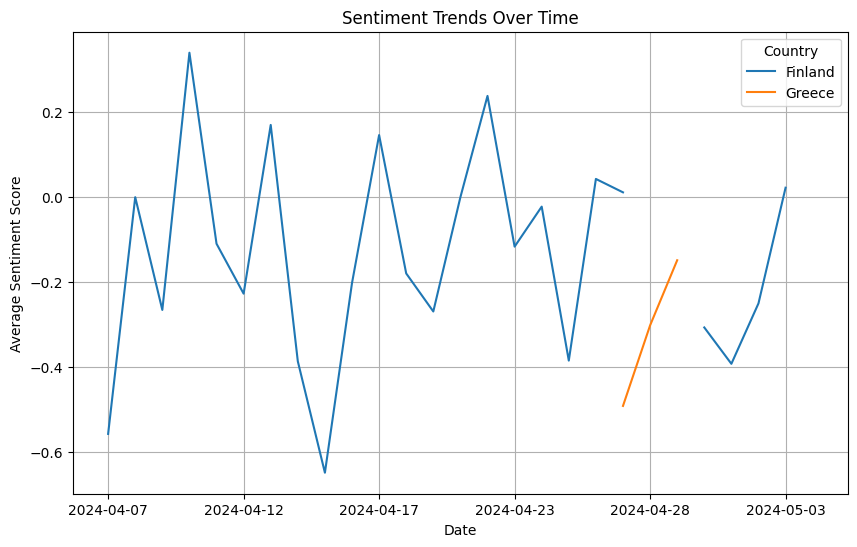

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the combined DataFrame from CSV file
combined_df = pd.read_csv('combined_data.csv')

# Remove the time part after the comma
combined_df['Time Content'] = combined_df['Time Content'].astype(str).apply(lambda x: x.split(',')[0])


# Impute missing dates with the previous available date
combined_df['Time Content'] = combined_df['Time Content'].fillna(method='ffill')

# Group the data by 'Time Content', 'Country', and 'Alt Content Sentiment' columns and calculate the average sentiment score
sentiment_trends = combined_df.groupby(['Time Content', 'Country'])['Sentiment'].mean().unstack()

# Plot the time-series trends for both countries
sentiment_trends.plot(figsize=(10, 6))
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend(title='Country')
plt.grid(True)
plt.show()